## Sentiment Analysis and Classification Project

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP notebooks/Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df_copy1 = df.copy()

### Data Wrangling

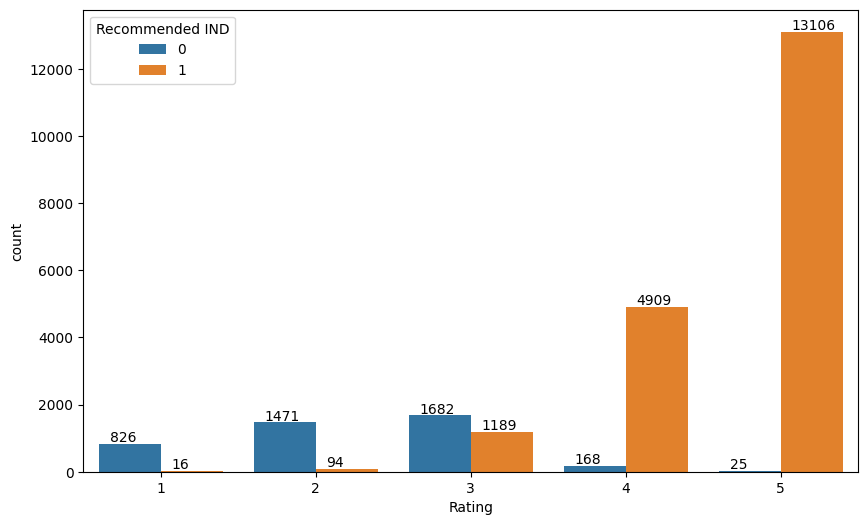

In [9]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.patches:
        ax.annotate('%.0f' % p.get_height(), (p.get_x() + 0.07, p.get_height() + 60))

In [10]:
df["Recommended IND"].unique()

array([1, 0])

In [11]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [12]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

#### Check Proportion of Target Class Variable:

[Text(0, 0, '4172'), Text(0, 0, '19314')]

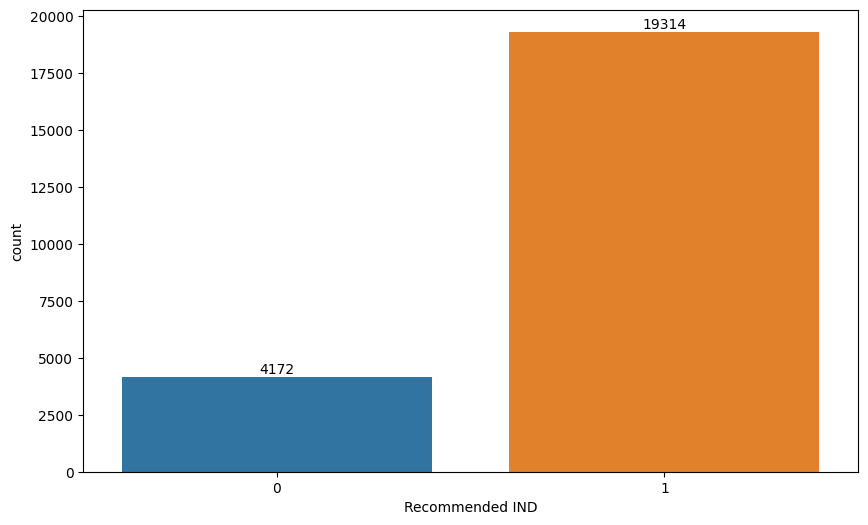

In [13]:
ax = sns.countplot(data = df, x = "Recommended IND")
ax.bar_label(ax.containers[0])

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [14]:
df = df[["Review Text", "Recommended IND"]]

In [15]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [16]:
df.rename(columns={"Review Text": "Review_Text", "Recommended IND": "Recommended_IND"}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [18]:
df.Recommended_IND = df.Recommended_IND.map({1:0, 0:1})

In [19]:
df.Recommended_IND.value_counts()

0    19314
1     4172
Name: Recommended_IND, dtype: int64

In [20]:
df.Recommended_IND.value_counts(normalize=True)

0    0.822362
1    0.177638
Name: Recommended_IND, dtype: float64

### Missing Value Detection

In [21]:
df.isnull().sum()

Review_Text        845
Recommended_IND      0
dtype: int64

In [22]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [23]:
df.isnull().sum()

Review_Text        0
Recommended_IND    0
dtype: int64

In [24]:
df.Recommended_IND.value_counts(normalize=True)

0    0.818868
1    0.181132
Name: Recommended_IND, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.9+ KB


In [26]:
df_copy2 = df.copy()

In [27]:
df_copy2.head()

,Review_Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [28]:
df.Review_Text[850]

'I loved the photo of this dress. upon examination of the dress (and trying it on) after receiving in the mail, the dress shown online is nothing like the dress i received save for the pattern. the dress i received has a side zip as well as a belt and no pleats on the top. the bottom is also cut straight across not as it appears in the photo. turns out it is not as flattering as it should appear.'

In [29]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [30]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
def cleaning(data):
   
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #2. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #3. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [32]:
# isalpha() sadece alfabetik olanlari getir.

In [33]:
# lemmatize() anlamli kelimeleri getir

In [34]:
df["Review_Text"] = df["Review_Text"].apply(cleaning)
df["Review_Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [35]:
df_negative = df[df.Recommended_IND == 1]
df_negative.head()

,Review_Text,Recommended_IND
2,high hope dress really wanted work initially o...,1
5,love tracy reese dress one not petite foot tal...,1
10,dress run small esp zipper area run ordered sp...,1
22,first not pullover styling side zipper wouldnt...,1
25,loved material didnt really look long dress pu...,1


In [36]:
df_positive = df[df.Recommended_IND == 0]
df_positive.head()

,Review_Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0
6,aded basket hte last mintue see would look lik...,0


### Collect Words (positive and negative separately)

In [37]:
positive_words = " ".join(df_positive.Review_Text)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [38]:
negative_words = " ".join(df_negative.Review_Text)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [39]:
# conda install -c conda-forge wordcloud

In [40]:
from wordcloud import WordCloud

In [41]:
# !pip install --upgrade pip

# !pip install --upgrade Pillow

In [42]:
worldcloud = WordCloud(background_color="white", max_words =250, colormap=plt.cm.hsv)

In [43]:
wp = worldcloud.generate(positive_words)

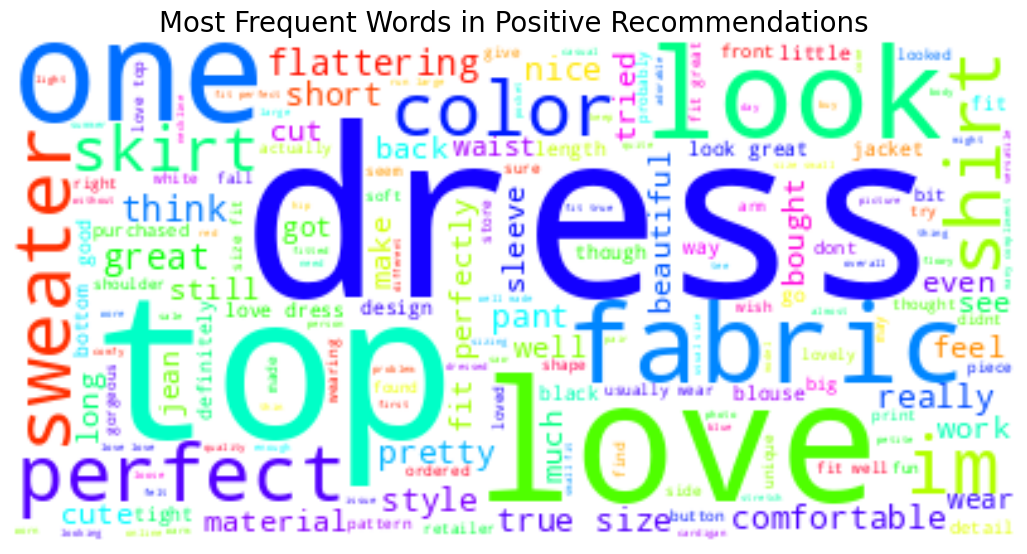

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wp, interpolation="bilinear")
plt.title("Most Frequent Words in Positive Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

In [45]:
wn = worldcloud.generate(negative_words)

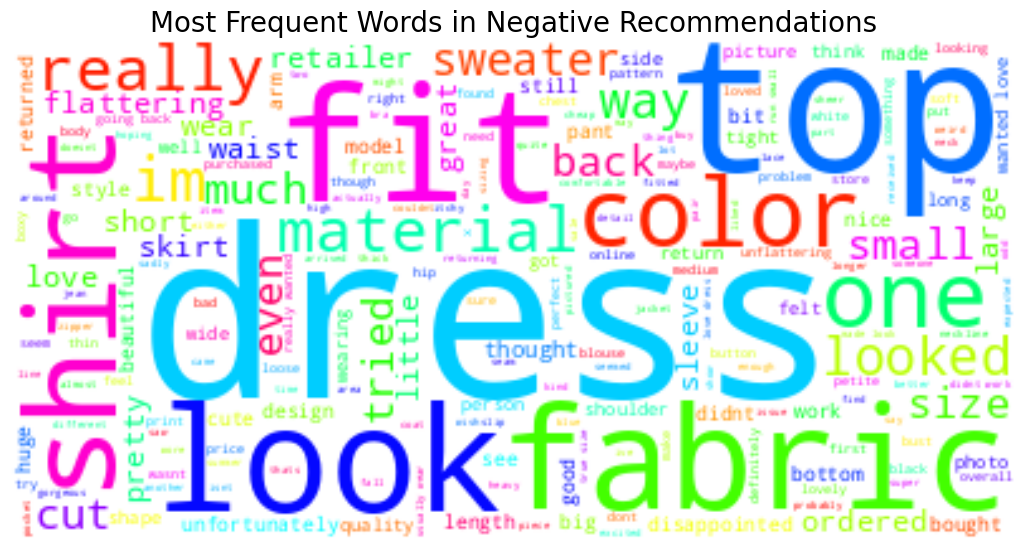

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wn, interpolation="bilinear")
plt.title("Most Frequent Words in Negative Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

In [47]:
# burada ki pozitif negatif kelimeleri nasil aldi. kendi anlami mi? cumle ici anlami mi?

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df["Review_Text"]
y= df["Recommended_IND"]

In the next step we create a numerical feature vector for each document:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

### Count Vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # butun datada 3 alti olanlari alma.
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [53]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20374,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
print(X_train.iloc[4])

absolutely love dress wore taupe tights suede boot got many compliment also worn legging see wearing warmer month sandal even though material somewhat thin not wear cami fabric pattern really cute


In [56]:
X_train.shape

(20376,)

### TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)            
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

### Eval Function

In [59]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [61]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1653  202]
 [  82  328]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1855
           1       0.62      0.80      0.70       410

    accuracy                           0.87      2265
   macro avg       0.79      0.85      0.81      2265
weighted avg       0.89      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     16685
           1       0.73      0.96      0.83      3691

    accuracy                           0.93     20376
   macro avg       0.86      0.94      0.89     20376
weighted avg       0.94      0.93      0.93     20376



In [62]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [63]:
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.607573
train_precision    0.734520
test_recall        0.789492
train_recall       0.967338
test_f1            0.686448
train_f1           0.835000
test_accuracy      0.869356
train_accuracy     0.930746
dtype: float64

In [64]:
log = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [65]:
print("LOG MODEL with C=0.01")
eval(log, X_train_count, X_test_count)

LOG MODEL with C=0.01
[[1581  274]
 [  64  346]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1855
           1       0.56      0.84      0.67       410

    accuracy                           0.85      2265
   macro avg       0.76      0.85      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16685
           1       0.58      0.88      0.70      3691

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [66]:
model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.554282
train_precision    0.575149
test_recall        0.849634
train_recall       0.883350
test_f1            0.670811
train_f1           0.696685
test_accuracy      0.848940
train_accuracy     0.860669
dtype: float64

In [67]:
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import PrecisionRecallDisplay, f1_score, recall_score, average_precision_score

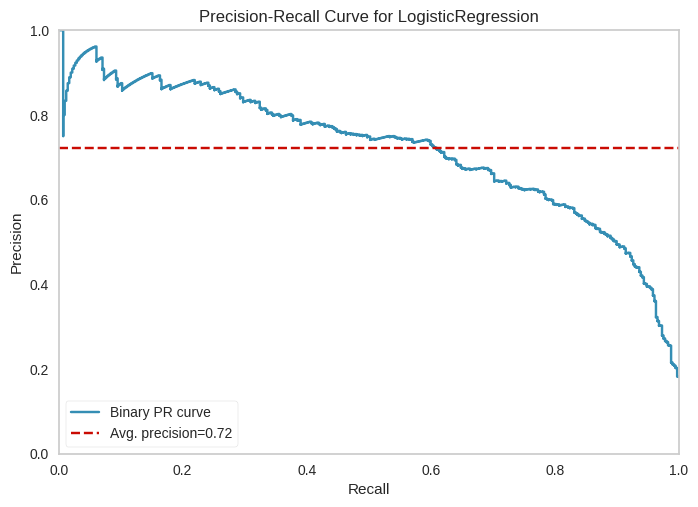

In [68]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.01, max_iter=1000, class_weight="balanced", random_state=101),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [69]:
log = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101).fit(X_train_count,y_train)

y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, average = 'binary') # burada tek label kullanıldığı için average None anlamsız. Eğer birden fazla label olsaydı o zaman average olarak macro, micro veya weighted kullanmak anlamlı olurdu. 
log_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
log_count_AP = viz.score_
log_count_AP

0.7214830354901813

### TF-IDF

In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [71]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1609  246]
 [  60  350]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1855
           1       0.59      0.85      0.70       410

    accuracy                           0.86      2265
   macro avg       0.78      0.86      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     16685
           1       0.64      0.93      0.76      3691

    accuracy                           0.89     20376
   macro avg       0.81      0.91      0.84     20376
weighted avg       0.92      0.89      0.90     20376



In [72]:
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.592996
train_precision    0.639994
test_recall        0.852616
train_recall       0.927662
test_f1            0.699358
train_f1           0.757433
test_accuracy      0.867197
train_accuracy     0.892368
dtype: float64

In [73]:
model = LogisticRegression(C= 0.1, max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.552731
train_precision    0.568887
test_recall        0.864269
train_recall       0.892531
test_f1            0.674141
train_f1           0.694871
test_accuracy      0.848596
train_accuracy     0.858008
dtype: float64

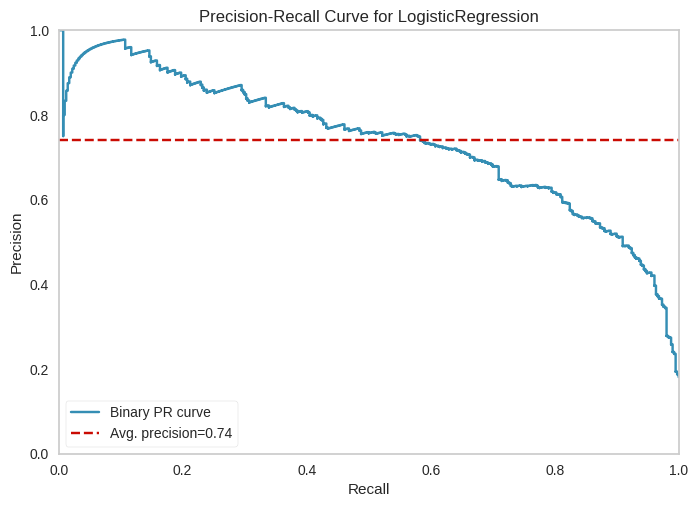

In [74]:
viz = PrecisionRecallCurve(
    LogisticRegression(C= 0.1, max_iter=1000, class_weight="balanced", random_state=101),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [75]:
log = LogisticRegression(C= 0.1, max_iter=1000, class_weight="balanced", random_state=101).fit(X_train_tf_idf, y_train)

y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary') # burada tek label kullanıldığı için average None anlamsız. Eğer birden fazla label olsaydı o zaman average olarak macro, micro veya weighted kullanmak anlamlı olurdu. 
log_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
log_tfidf_AP = viz.score_
log_tfidf_AP

0.740440548074816

## Naive Bayes 

### Countvectorizer

In [76]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.76022758, 2.76022758, 0.61060833, ..., 0.61060833, 0.61060833,
       0.61060833])

In [77]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [78]:
nb = MultinomialNB(alpha=1)  # test datasında train datasındaki unique datası arasında fark olmadığı zaman olasılık değerini sıfıra çeker.
                            # Bunu önlemek için bütün olasılık hesaplarını alfayı kullanarak düzenler.
                            # alfayı paya ekleyerek, paydaya da total olumlu/olumsuz sayısı ile alfayı çarpıp ekleyerek düzenlemeyi yapar.
                            # Aynı zamanda naive bayes için bir overfitting parametresidir. Bu değeri ayarlayarak overfitting'e gitme durumlarını çözebiliriz.
nb.fit(X_train_count, y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [79]:
print("NB MODEL with CountVectorizer")
eval(nb, X_train_count, X_test_count)

NB MODEL with CountVectorizer
[[1588  267]
 [  53  357]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1855
           1       0.57      0.87      0.69       410

    accuracy                           0.86      2265
   macro avg       0.77      0.86      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     16685
           1       0.60      0.91      0.73      3691

    accuracy                           0.88     20376
   macro avg       0.79      0.89      0.82     20376
weighted avg       0.91      0.88      0.89     20376



In [80]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.573103
train_precision    0.608366
test_recall        0.856416
train_recall       0.914416
test_f1            0.686571
train_f1           0.730634
test_accuracy      0.858314
train_accuracy     0.877863
dtype: float64

In [81]:
# alpha=10 ile kuruyoruz modeli.
model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.557856
train_precision    0.578786
test_recall        0.872668
train_recall       0.906650
test_f1            0.680546
train_f1           0.706533
test_accuracy      0.851590
train_accuracy     0.863565
dtype: float64

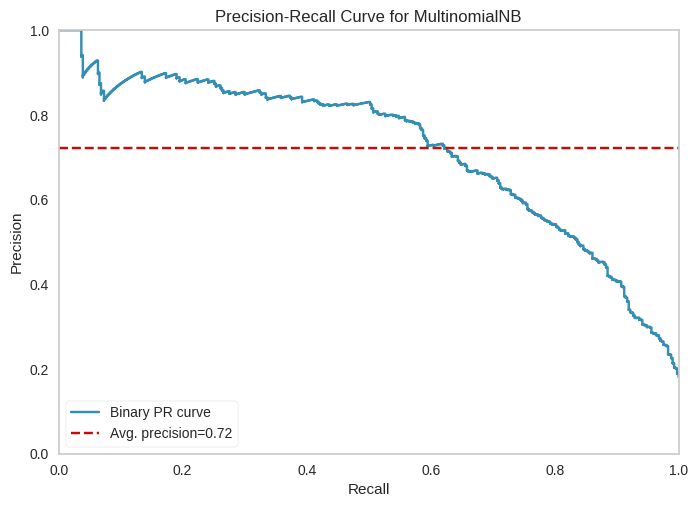

In [82]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=10),
    classes=nb.classes_,  # grafikte class isimleri ile birlikte score lar gelsin diye 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [83]:
nb = MultinomialNB(alpha=10).fit(X_train_count, y_train)

y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
nb_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
nb_count_AP = viz.score_
nb_count_AP

0.7210585556873033

### TF-IDF

In [84]:
nb = MultinomialNB(alpha=1)  # test datasında train datasındaki unique datası arasında olmadığı zaman olasılık değerini sıfıra çeker.
                            # Bunu önlemek için bütün olasılık hesaplarını alfayı kullanarak düzenler.
                            # alfayı paya ekleyerek, paydaya da total olumlu/olumsuz sayısı ile alfayı çarpıp ekleyerek düzenlemeyi yapar.
                            # Aynı zamanda naive bayes için bir overfitting parametresidir. Bu değeri ayarlayarak overfitting'e gitme durumlarını çözebiliriz.
nb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [85]:
print("NB MODEL with CountVectorizer")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL with CountVectorizer
[[1572  283]
 [  51  359]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1855
           1       0.56      0.88      0.68       410

    accuracy                           0.85      2265
   macro avg       0.76      0.86      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     16685
           1       0.59      0.91      0.72      3691

    accuracy                           0.87     20376
   macro avg       0.78      0.89      0.82     20376
weighted avg       0.91      0.87      0.88     20376



In [86]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.559319
train_precision    0.593874
test_recall        0.864814
train_recall       0.918360
test_f1            0.679152
train_f1           0.721301
test_accuracy      0.851933
train_accuracy     0.871445
dtype: float64

In [87]:
model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.545759
train_precision    0.564478
test_recall        0.880526
train_recall       0.909991
test_f1            0.673771
train_f1           0.696749
test_accuracy      0.845504
train_accuracy     0.856509
dtype: float64

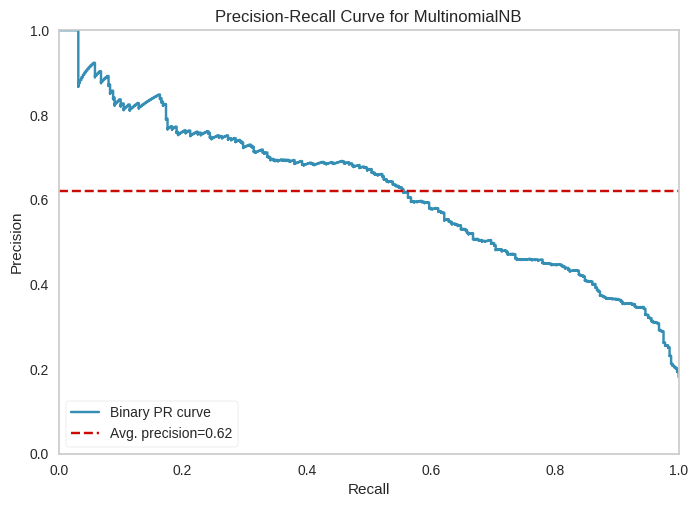

In [88]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=10),
    classes=nb.classes_,  # grafikte class isimleri ile birlikte score lar gelsin diye 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [89]:
nb = MultinomialNB(alpha=10).fit(X_train_tf_idf, y_train)

y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
nb_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
nb_tfidf_AP = viz.score_
nb_tfidf_AP

0.621247816296213

## Support Vector Machine (SVM)

### Countvectorizer

In [90]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(class_weight='balanced', random_state=101)

In [91]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1651  204]
 [ 105  305]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1855
           1       0.60      0.74      0.66       410

    accuracy                           0.86      2265
   macro avg       0.77      0.82      0.79      2265
weighted avg       0.88      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16685
           1       0.81      0.98      0.89      3691

    accuracy                           0.95     20376
   macro avg       0.90      0.96      0.93     20376
weighted avg       0.96      0.95      0.96     20376



In [92]:
model = LinearSVC(class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.580903
train_precision    0.825039
test_recall        0.704699
train_recall       0.983895
test_f1            0.636620
train_f1           0.897487
test_accuracy      0.854338
train_accuracy     0.959282
dtype: float64

In [93]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.553761
train_precision    0.575554
test_recall        0.851532
train_recall       0.886691
test_f1            0.671016
train_f1           0.698020
test_accuracy      0.848744
train_accuracy     0.861024
dtype: float64

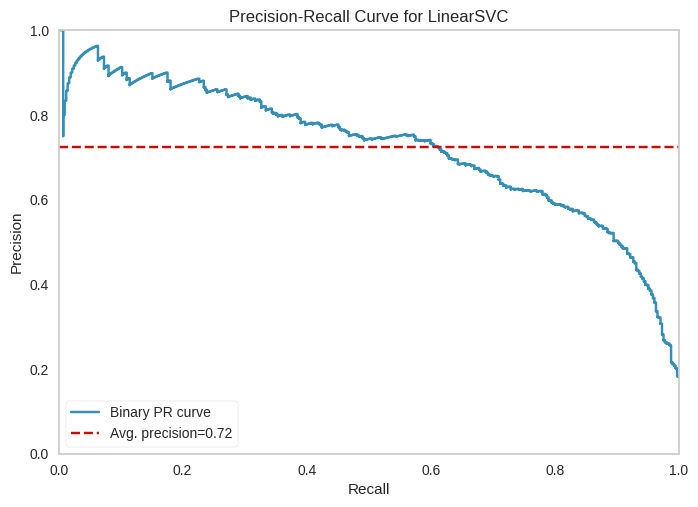

In [94]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [95]:
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101).fit(X_train_count, y_train)

y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
svc_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
svc_count_AP = viz.score_
svc_count_AP

0.7241981545453249

### TD-IDF

In [96]:
from sklearn.svm import LinearSVC  # daha az maliyetli olduğu için linearSVC tercih edildi.
svc = LinearSVC(class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(class_weight='balanced', random_state=101)

In [97]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1632  223]
 [  76  334]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1855
           1       0.60      0.81      0.69       410

    accuracy                           0.87      2265
   macro avg       0.78      0.85      0.80      2265
weighted avg       0.89      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     16685
           1       0.72      0.97      0.83      3691

    accuracy                           0.93     20376
   macro avg       0.86      0.94      0.89     20376
weighted avg       0.94      0.93      0.93     20376



In [98]:
model = LinearSVC(class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.605026
train_precision    0.725205
test_recall        0.800054
train_recall       0.971673
test_f1            0.688783
train_f1           0.830534
test_accuracy      0.869062
train_accuracy     0.928167
dtype: float64

In [99]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.548835
train_precision    0.565520
test_recall        0.868874
train_recall       0.896114
test_f1            0.672635
train_f1           0.693427
test_accuracy      0.846731
train_accuracy     0.856465
dtype: float64

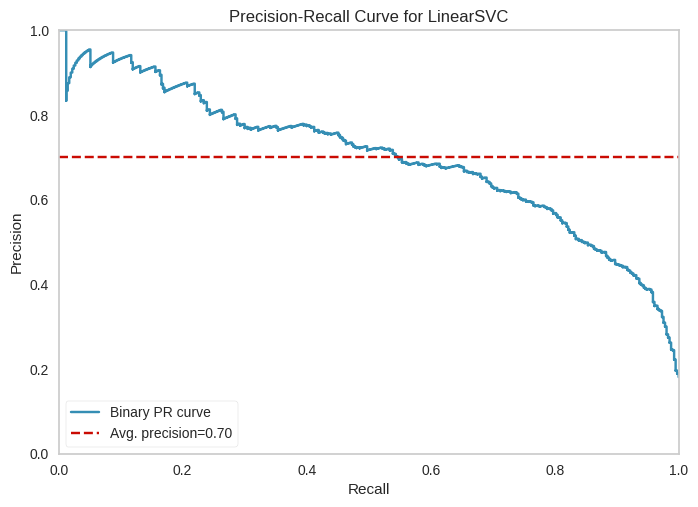

In [100]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [101]:
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101).fit(X_train_tf_idf, y_train)

y_pred = svc .predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
svc_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
svc_tfidf_AP = viz.score_
svc_tfidf_AP

0.7013150700743981

## Random Forest

### Countvectorizer

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 10, class_weight="balanced", random_state = 101, n_jobs = -1)
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [103]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1581  274]
 [  79  331]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1855
           1       0.55      0.81      0.65       410

    accuracy                           0.84      2265
   macro avg       0.75      0.83      0.78      2265
weighted avg       0.88      0.84      0.85      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     16685
           1       0.60      0.88      0.71      3691

    accuracy                           0.87     20376
   macro avg       0.78      0.87      0.81     20376
weighted avg       0.90      0.87      0.88     20376



In [104]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1).fit(X_train_count, y_train)

y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
rf_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
rf_count_AP = viz.score_
rf_count_AP

0.7013150700743981

### TF-IDF

In [105]:
model = RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.514323
train_precision    0.539416
test_recall        0.803032
train_recall       0.845179
test_f1            0.626806
train_f1           0.658452
test_accuracy      0.826806
train_accuracy     0.841109
dtype: float64

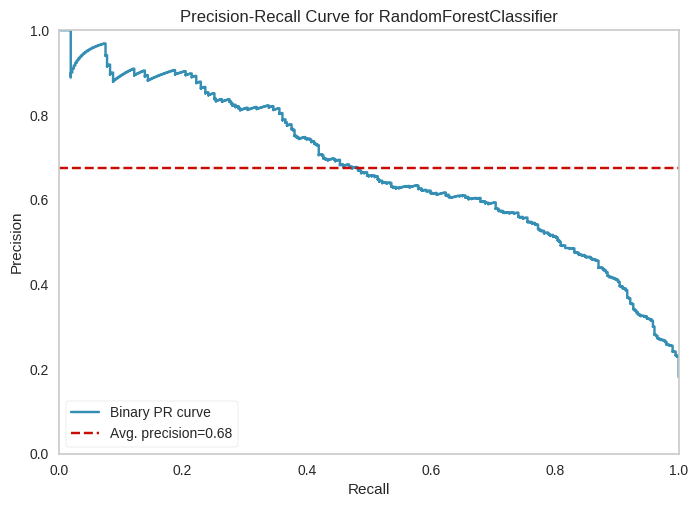

In [106]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [107]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1).fit(X_train_tf_idf, y_train)

y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
rf_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
rf_tfidf_AP = viz.score_
rf_tfidf_AP

0.6756715210831903

## Ada Boosting

### Countvectorizer

In [108]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [109]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1562  293]
 [  95  315]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1855
           1       0.52      0.77      0.62       410

    accuracy                           0.83      2265
   macro avg       0.73      0.81      0.75      2265
weighted avg       0.87      0.83      0.84      2265

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.83      0.89     16685
           1       0.51      0.78      0.62      3691

    accuracy                           0.82     20376
   macro avg       0.73      0.81      0.75     20376
weighted avg       0.87      0.82      0.84     20376



In [110]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10,
                        return_train_score=True,
                        fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.496929
train_precision    0.506339
test_recall        0.769708
train_recall       0.782926
test_f1            0.603719
train_f1           0.614954
test_accuracy      0.816893
train_accuracy     0.822395
dtype: float64

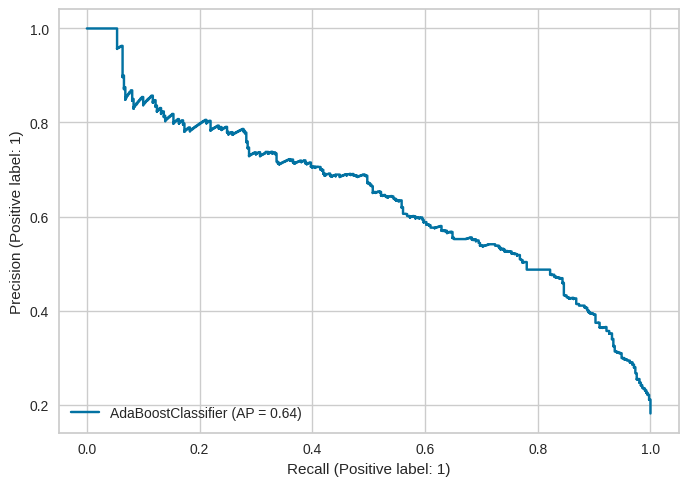

In [111]:
model = AdaBoostClassifier(random_state = 101)
model.fit(X_train_count, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=1)
plt.show()

In [112]:
ada = AdaBoostClassifier(random_state = 101).fit(X_train_count, y_train, sample_weight=classes_weights)

y_pred = ada.predict(X_test_count)
y_pred_proba = ada.predict_proba(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, average = 'binary')
ada_count_f1_neg = f1_score(y_test, y_pred, average = 'binary')
ada_count_AP = average_precision_score(y_test, y_pred_proba[:,1])
ada_count_AP

0.6410648208878853

### TF-IDF

In [113]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [114]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1523  332]
 [ 105  305]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1855
           1       0.48      0.74      0.58       410

    accuracy                           0.81      2265
   macro avg       0.71      0.78      0.73      2265
weighted avg       0.85      0.81      0.82      2265

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     16685
           1       0.50      0.79      0.61      3691

    accuracy                           0.82     20376
   macro avg       0.72      0.81      0.75     20376
weighted avg       0.87      0.82      0.83     20376



In [115]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.483214
train_precision    0.496520
test_recall        0.773500
train_recall       0.795719
test_f1            0.594506
train_f1           0.611065
test_accuracy      0.808697
train_accuracy     0.816309
dtype: float64

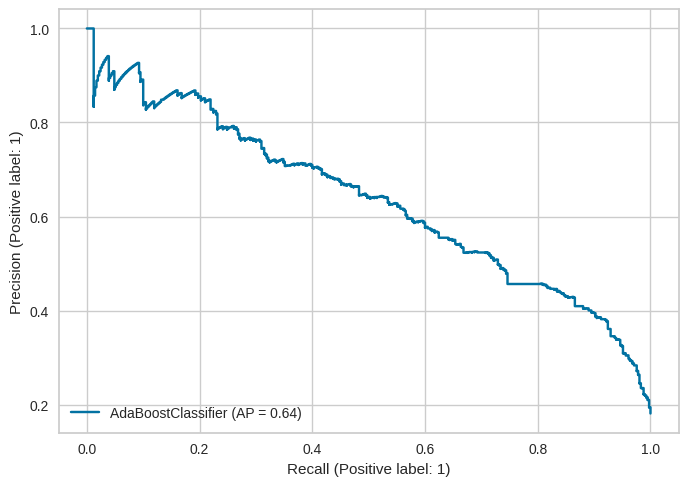

In [116]:
model = AdaBoostClassifier(random_state = 101)
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=1)
plt.show()

In [117]:
ada = AdaBoostClassifier(random_state = 101).fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

y_pred = ada.predict(X_test_tf_idf)
y_pred_proba = ada.predict_proba(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, average = 'binary')
ada_tfidf_f1_neg = f1_score(y_test, y_pred, average = 'binary')
ada_tfidf_AP = average_precision_score(y_test, y_pred_proba[:,1])
ada_tfidf_AP

0.6352981592610333

## DL modeling

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [119]:
X = df_copy2["Review_Text"]
y = df_copy2["Recommended_IND"]

### Tokenization

In [120]:
tokenizer = Tokenizer() # as we have small data we didn't use num_words parameter

tokenizer.fit_on_texts(X)

In [121]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [122]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [123]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [124]:
len(tokenizer.word_index)

14847

### Maximum number of tokens for all documents¶

In [125]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [126]:
X[77]

"The zipper broke on this piece the first time i wore it. very disappointing since i love the design. i'm actually going to try to replace the zipper myself with something stronger, but annoying that it's come to that."

In [127]:
print(X_num_tokens[77])

[1, 469, 2021, 11, 7, 198, 1, 171, 183, 2, 227, 5, 23, 950, 235, 2, 21, 1, 142, 36, 291, 176, 8, 179, 8, 2626, 1, 469, 573, 14, 294, 5106, 10, 2048, 20, 33, 484, 8, 20]


In [128]:
len(X_num_tokens[77])

39

In [129]:
print(X_num_tokens[106])

[54, 18, 12, 495, 2088, 2955, 452]


In [130]:
len(X_num_tokens[106])

7

In [131]:
len(X_num_tokens[7])

97

In [132]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [133]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [134]:
num_tokens.mean()

60.60699615741354

In [135]:
num_tokens.max()

116

In [136]:
num_tokens.argmax() 

16263

In [137]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [138]:
len(X_num_tokens[16263])

116

In [139]:
max_tokens = 103  # %95 veri lacak şekilde bir max_toke belirliyoruz.

In [140]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9564948544675589

In [141]:
sum(num_tokens < max_tokens)

21656

In [142]:
len(num_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [143]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [144]:
X_pad.shape

(22641, 103)

In [145]:
len(np.array(X_num_tokens[800]))

20

In [146]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    5,    6,   16,  548,   10,
        676,    3,   73,    2,   38,  384,    3,  659, 1077,    3,  285,
         46,   78,   31,  150], dtype=int32)

In [147]:
np.array(X_num_tokens[16263])

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4])

In [148]:
X_pad[16263]

array([  74,    2,  196,    1,  447,  218,   20,  364,   62,    2,  516,
          8,   17,  494,  106,    8,  179,   56,   11,   36,  107,    4,
         79,    9,    4,   25,  425,    9,    4,  247,   60,  418,   42,
        117,   65,    4,   79,    8,  179,   16,    2,  104,    5,    9,
          1,  123,  791,    2,  118,  778,  115,    1,   25,   11,    5,
        157,   28,    2,   15, 1609,  504,  160,   13,    1,   25,    2,
       4114, 1777,    1,   22,    3,    5,   15,    4,   79,   33,    4,
       1376,    1,   25,    6,   51,   69,   49,   40,   27,    1,  502,
         77,  652,   37,  583,  147,   43,    4,   22,   37,  262,   49,
         40,   27,  107,    4], dtype=int32)

In [149]:
len(X_num_tokens)

22641

### Train Set Split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=0)

### Modeling

In [151]:
embedding_size = 50

In [152]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,
                    output_dim=embedding_size,  
                    input_length=max_tokens)) 

model.add(Dropout(0.5))

model.add(GRU(units=48, return_sequences=True))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(units=12))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [153]:
optimizer = Adam(learning_rate=0.001)

In [154]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [155]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 103, 50)           742400    
                                                                 
 dropout (Dropout)           (None, 103, 50)           0         
                                                                 
 gru (GRU)                   (None, 103, 48)           14400     
                                                                 
 dropout_1 (Dropout)         (None, 103, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 103, 24)           5328      
                                                                 
 dropout_2 (Dropout)         (None, 103, 24)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [156]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",  # NLP modelleri için recall ve precision için mode=max, loss için mode=min kullanılmalıdır.
                           verbose=1, patience = 2, restore_best_weights=True)

In [157]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [158]:
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight= classes_weights,  # batch size ın küçük olması çoğunlukla eğitimin daha iyi olmasını sağlar. Bu nedenle overfittingi gidermek için büyük batch size lar kullanabilirsiniz.
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
637/637 [==============================] - 137s 204ms/step - loss: 0.4813 - recall: 0.7545 - val_loss: 0.3047 - val_recall: 0.8390
Epoch 2/10
637/637 [==============================] - 130s 204ms/step - loss: 0.3200 - recall: 0.9003 - val_loss: 0.3589 - val_recall: 0.8854
Epoch 3/10
637/637 [==============================] - 128s 200ms/step - loss: 0.2755 - recall: 0.9255 - val_loss: 0.3417 - val_recall: 0.8561
Epoch 4/10
637/637 [==============================] - 127s 200ms/step - loss: 0.2300 - recall: 0.9428 - val_loss: 0.3128 - val_recall: 0.8024
Epoch 4: early stopping


In [159]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.481311,0.754538,0.304697,0.839024
1,0.319979,0.900298,0.358909,0.885366
2,0.275476,0.925494,0.341659,0.856098
3,0.229999,0.942834,0.312766,0.802439


<Axes: >

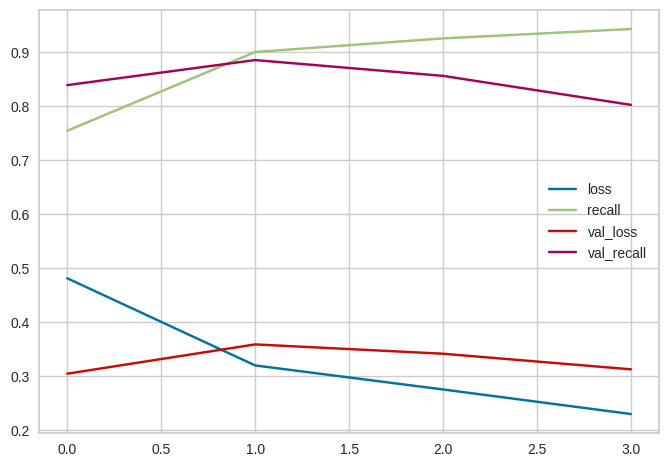

In [160]:
model_loss.plot()

### Model Evaluation

In [161]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 2s 35ms/step - loss: 0.3589 - recall: 0.8854


[0.3589092493057251, 0.8853658437728882]

In [162]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 25s 39ms/step - loss: 0.2591 - recall: 0.9621


[0.25910505652427673, 0.9620699286460876]

In [163]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5
y_train_pred = model.predict(X_train) >= 0.5

print("Test Result")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("###"*20)
print("Train Result")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 23s 36ms/step
Test Result
[[1562  293]
 [  47  363]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1855
           1       0.55      0.89      0.68       410

    accuracy                           0.85      2265
   macro avg       0.76      0.86      0.79      2265
weighted avg       0.90      0.85      0.86      2265

############################################################
Train Result
[[14707  1978]
 [  140  3551]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     16685
           1       0.64      0.96      0.77      3691

    accuracy                           0.90     20376
   macro avg       0.82      0.92      0.85     20376
weighted avg       0.93      0.90      0.90     20376



71/71 [==============================] - 2s 32ms/step


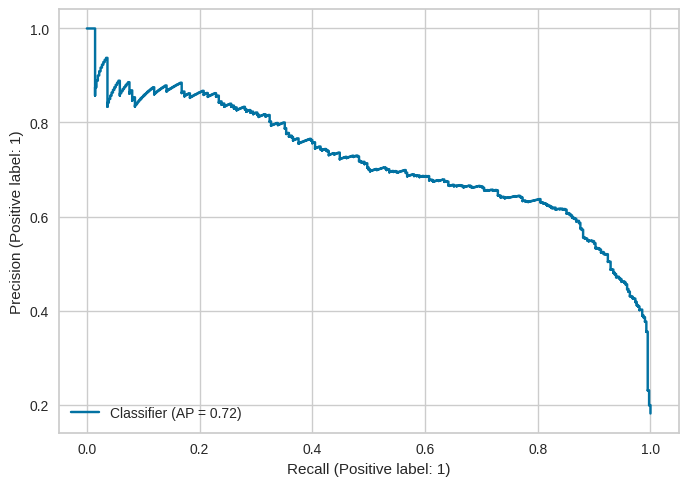

In [164]:
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

In [165]:
model.save('/content/drive/MyDrive/NLP/DL_model_sentiment.h5')

In [166]:
y_pred = (model.predict(X_test) > 0.5).astype("int")
y_pred_proba = model.predict(X_test)
DL_rec_neg = recall_score(y_test, y_pred, average = 'binary')
DL_f1_neg = f1_score(y_test, y_pred, average = 'binary')
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_AP

71/71 [==============================] - 2s 32ms/step


0.7182876488395151

## BERT Modeling

In [167]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [168]:
strategy = tf.distribute.TPUStrategy(resolver)

In [169]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.6 MB/s eta 0:00:00


### Read Data

In [170]:
df_copy2.head()

,Review_Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


In [171]:
X = df_copy2['Review_Text'].values
y = df_copy2['Recommended_IND'].values

### Train test split

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

### Tokenization

In [173]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Fixing token counts of all documents

In [174]:
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [175]:
import numpy as np
from scipy import stats

arr = np.array(max_token)
 
print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", stats.mode(arr)[0][0])

# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22641
Doc Token Count	= [ 10  82 118 ...  54 102  26]
Measures of Central Tendency
Mean 		= 76.75659202332052
Median 		= 75.0
Mode 		= 122
Measures of Dispersion
Minimum 	= 4
Maximum 	= 162
Range 		= 158
Variance 	= 1251.4350770125225
Standard Deviation = 35.37562829141728


### Transformation Vectors to Matrices

In [176]:
def transformation(X):
  # set array dimensions
  seq_len = 163  # max +1
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [177]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [178]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [179]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [180]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [181]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [182]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [183]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [184]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(163,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(163,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [185]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(163,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(163,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [186]:
batch_size = 32 # 16, 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size) # train_ds will be used for model testing 
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size) # train_ds will be used 

### Creating optimization

In [187]:
def create_model():
    seq_len =163
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased") # token işlemleri uncased üzerine yapıldığı için model de uncased üzerine kurulmalıdır.
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32') # Bert modelleri datayı int32 olarak ister. Bu nedenle dtype="int32" mutlaka belirtilmelidir.
    attention_mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1] # input_id ve attention_mask vererek BERT modellerinin eğitildiğii sırada oluşturduğu word embeddingleri kendi inputumuz için çekiyoruz. Pooler output BERT modelinin word embedding değerlerinin tutulduğu katman. Aynı zamanda 1. katman olduğu için [1] olarak da kullanılabilir.

    x = tf.keras.layers.Dense(seq_len, activation='relu')(embeddings) # sonuna embeddings yazdığımızda embedding bilgilerini buraya aktarır. Cümle içerisindeki bütün tokenlerin birbiri ile kullanımını son bir kes görmek için bu dense layer kullanılıyor.
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

### Creating Model with TPU

In [188]:
with strategy.scope():  # TPU synchronization
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5 # BERT modellerinde tavsiye edilen learning rate değerleri
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [189]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 163)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 163)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 163,                                           

### Model Fiting

In [190]:
history = model3.fit(
    train_ds2, validation_data= val_ds, class_weight= {0:1, 1:4},
    epochs=1) #epoch= 2 or 3

637/637 [==============================] - 206s 182ms/step - loss: 0.4610 - recall: 0.8889 - val_loss: 0.3106 - val_recall: 0.9537


### Model evaluation

In [191]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

71/71 [==============================] - 13s 98ms/step
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1855
           1       0.59      0.95      0.73       410

    accuracy                           0.87      2265
   macro avg       0.79      0.90      0.82      2265
weighted avg       0.92      0.87      0.88      2265



In [192]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred)) 

637/637 [==============================] - 23s 34ms/step
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     16685
           1       0.63      0.99      0.77      3691

    accuracy                           0.89     20376
   macro avg       0.81      0.93      0.85     20376
weighted avg       0.93      0.89      0.90     20376



71/71 [==============================] - 4s 30ms/step


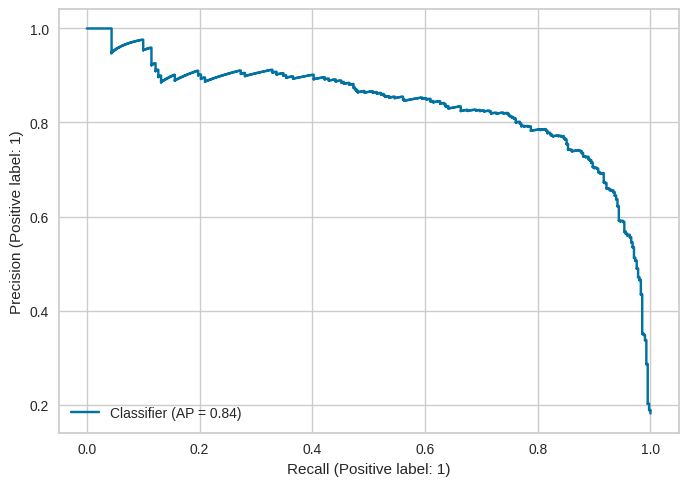

In [193]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [194]:
model3.save("/content/drive/MyDrive/NLP/BERT_model.h5")

In [195]:
from tensorflow.keras.models import load_model

model4 = load_model('/content/drive/MyDrive/NLP/BERT_model.h5')

In [196]:
y_pred_proba = model4.predict(val_ds)
y_pred = (y_pred_proba > 0.5).astype("int")
BERT_rec = recall_score(y_test, y_pred)
BERT_f1 = f1_score(y_test, y_pred)
BERT_AP = average_precision_score(y_test, y_pred_proba)

71/71 [==============================] - 96s 1s/step


In [197]:
BERT_AP

0.8391277727337751

### Compare Models F1 Scores, Recall Scores and Average Precision Score

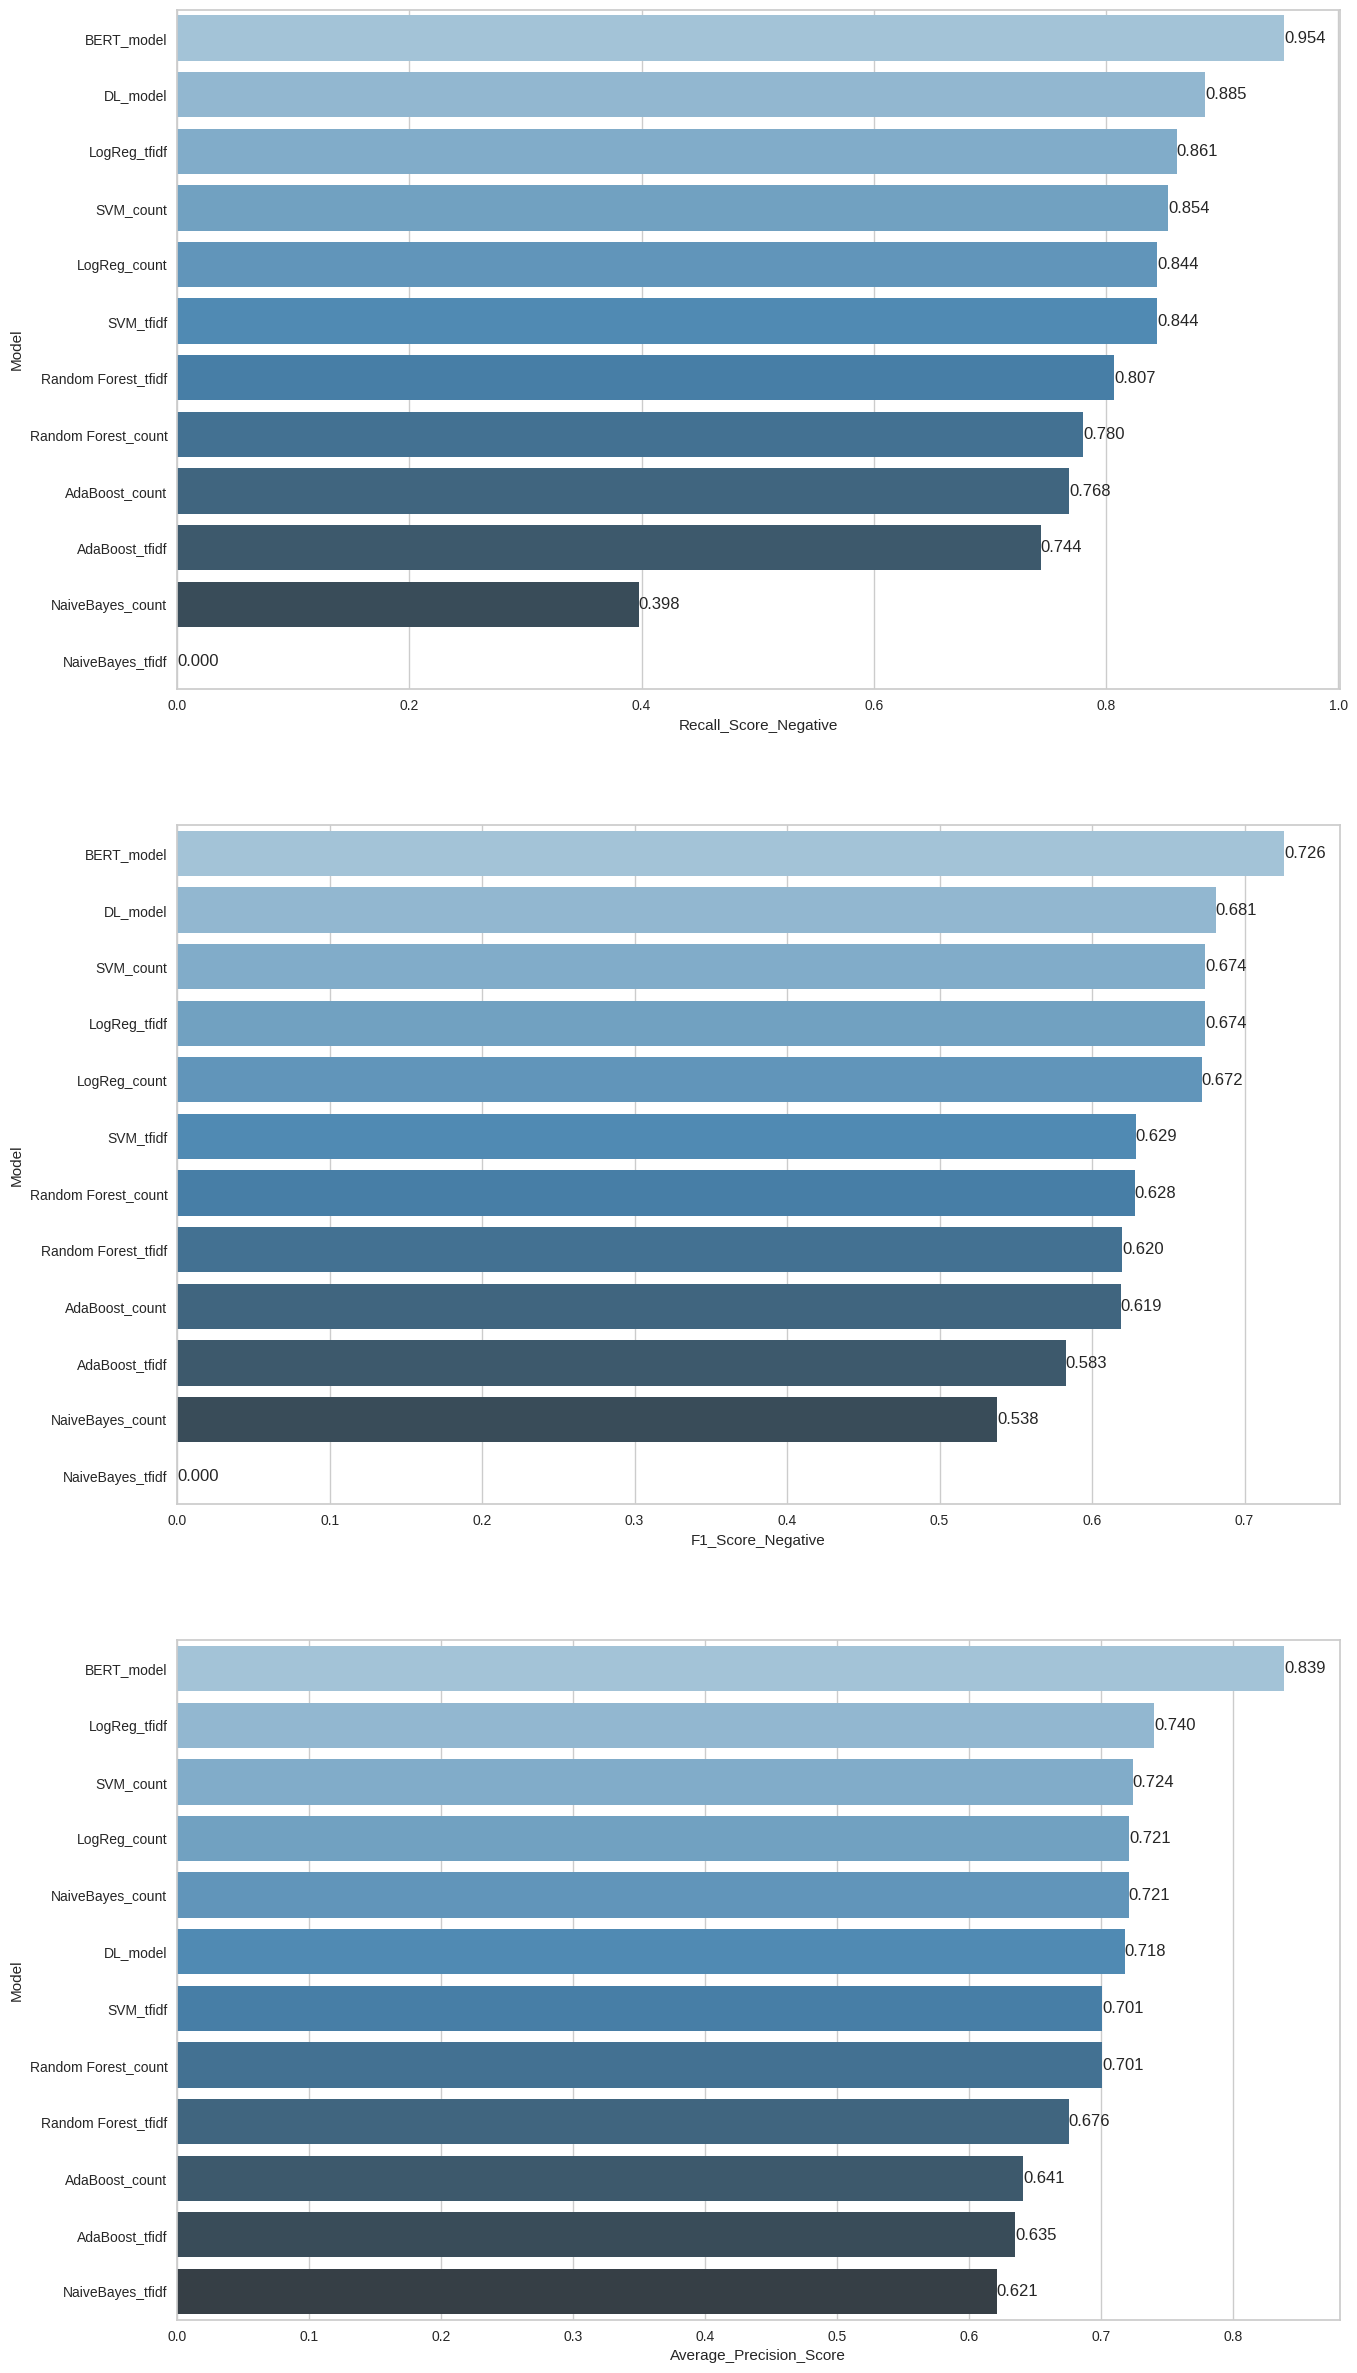

In [198]:
compare = pd.DataFrame({"Model": ["LogReg_count", "LogReg_tfidf", "NaiveBayes_count", "NaiveBayes_tfidf", "SVM_count", "SVM_tfidf", "Random Forest_count", 
                                  "Random Forest_tfidf", "AdaBoost_count", "AdaBoost_tfidf", "DL_model", "BERT_model"],
                        
                        "F1_Score_Negative": [log_count_f1_neg, log_tfidf_f1_neg, nb_count_f1_neg, nb_tfidf_f1_neg, svc_count_f1_neg, svc_tfidf_f1_neg,
                                             rf_count_f1_neg, rf_tfidf_f1_neg, ada_count_f1_neg, ada_tfidf_f1_neg, DL_f1_neg, BERT_f1],  
                        
                        "Recall_Score_Negative": [log_count_rec_neg, log_tfidf_rec_neg, nb_count_rec_neg, nb_tfidf_rec_neg, svc_count_rec_neg,
                                                  svc_tfidf_rec_neg, rf_count_rec_neg, rf_tfidf_rec_neg, ada_count_rec_neg, ada_tfidf_rec_neg,
                                                  DL_rec_neg, BERT_rec],
                        
                        "Average_Precision_Score": [log_count_AP, log_tfidf_AP, nb_count_AP, nb_tfidf_AP, svc_count_AP, svc_tfidf_AP, rf_count_AP,
                                                          rf_tfidf_AP, ada_count_AP, ada_tfidf_AP, DL_AP, BERT_AP]})


# plot model comparision metrics for each model

plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion

BERT model can be preferred. His score is higher than others.